In [ ]:
# !pip install keras
# !pip install tensorflow

# Sync helper files from AWS S3

In [1]:
import boto3
import os

In [ ]:
# s3 = boto3.resource("s3")
# BUCKET_NAME = "sagemaker-binary-mnist"
# BUCKET = s3.Bucket(BUCKET_NAME)

In [ ]:
# PATH_TO_DESTINATION = ""

# for obj in BUCKET.objects.all():
#     path, file_name = os.path.split(obj.key)
#     # Download only if it's a file with a filename
#     if file_name:
#         BUCKET.download_file(obj.key, os.path.join(PATH_TO_DESTINATION, file_name))

# Load MNIST data

In [3]:
from utils_data import *

# download_and_save_MNIST(path="data/")

In [4]:
X_train_org, Y_train_org, X_test_org, Y_test_org = load_mnist()
X_train_org, Y_train_org, X_test_org, Y_test_org = load_binary_mnist(X_train_org, Y_train_org, X_test_org, Y_test_org)

# Data visualization

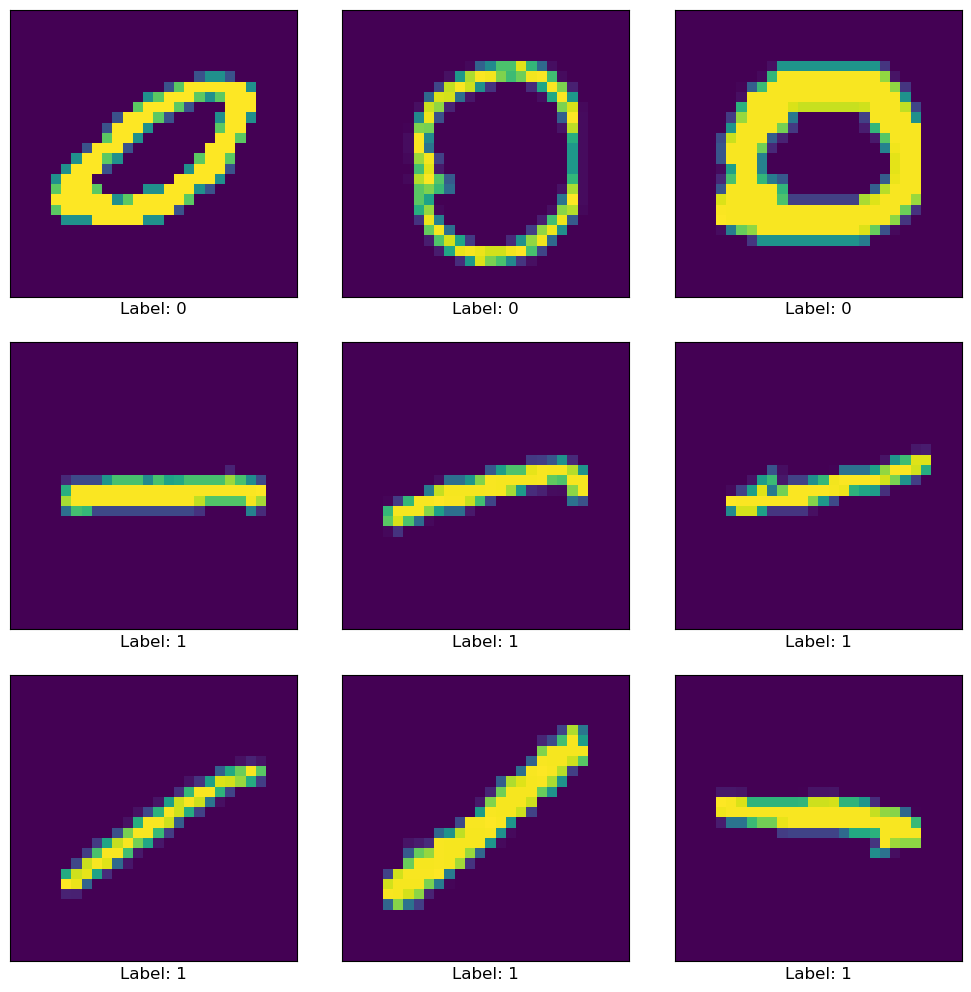

In [5]:
visualize_multi_images(X_train_org, Y_train_org, layout=(3, 3), figsize=(10, 10), fontsize=12)

# Sync data from SageMaker to AWS S3

In [ ]:
# key = "data/mnist.npz"
# bucket_url = "s3://{}/{}".format(BUCKET_NAME, key)
# boto3.Session().resource("s3").Bucket(BUCKET_NAME).Object(key).upload_file("data/mnist.npz")

# Data preparation for model training

In [6]:
X_train, X_test, Y_train, Y_test = make_inputs(X_train_org, X_test_org, Y_train_org, Y_test_org)

# Build a Neural Network for solving binary MNIST

In [7]:
layer_dims = [784, 128, 64, 1]
learning_rate = 0.01
number_iterations = 250

# Train the Neural Network

In [8]:
from utils_binary import *

parameters, costs, time = nn_Llayers_binary(X_train, Y_train, layer_dims, learning_rate, number_iterations, print_cost=False)

Execution time: 70.09 seconds


# Compute accuracy on train and test datasets

In [9]:
Yhat_train = predict_binary(X_train, Y_train, parameters)
train_accuracy = compute_accuracy(Yhat_train, Y_train)

Yhat_test = predict_binary(X_test, Y_test, parameters)
test_accuracy = compute_accuracy(Yhat_test, Y_test)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 99.65
Test accuracy: 99.81


# Visualize misclassified elements

[ 626 1388 2031 2087]


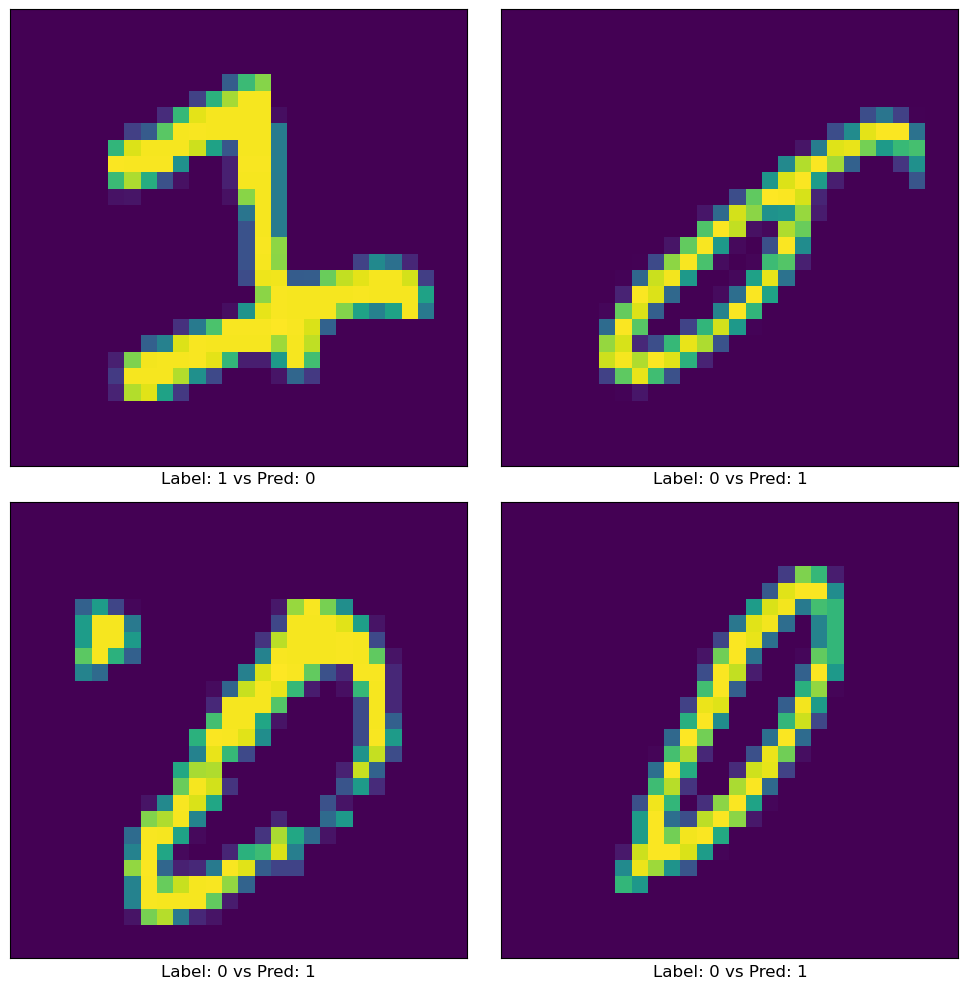

In [10]:
Y_view = Y_test.reshape(-1)
X_view = X_test.T  # Transposing if needed
Yhat_test = Yhat_test.reshape(-1)
height, width = 28, 28

# Find the indices where predictions don't match the labels
err_i = np.where(Yhat_test != Y_view)[0]

print(err_i)

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through the first four elements in err_i
for idx, i in enumerate(err_i[:4]):
    # Retrieve the corresponding image and label
    image = X_view[i].reshape(height, width)

    # Plot the image in its respective subplot
    axes[idx].imshow(image)
    axes[idx].set_xlabel(f"Label: {Y_view[i]} vs Pred: {int(Yhat_test[i])}", fontsize=12)    
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

plt.tight_layout()
plt.show()